<img src="https://github.com/CorndelDataAnalyticsDiploma/workshop/blob/master/Corndel%20Digital%20Logo%20Centre.png?raw=true" alt="Corndel" width ="301.5" align="left">


# Linear Regression Analysis


In this first section we will look at the traditional stasticians approach to Linear Regression.\
These modles are built to gain understanding and explain how factors are contributing to an output that has a Linear Response.\
This traditional approach involves ensuring lots of assumptions are satisfied.\
We will not go into depth with these assumpitons as our focus is on building predictive models and that has a different approach.\

In the second section we will build a predictive model and asses this against our dataset.






### Simple Linear Regression

In [1]:
# Import all relevant libraries discuss each one

import matplotlib.pyplot as plt
import statsmodels.api as sm

import math
import pandas as pd

import seaborn as sns

import os

# Intro Simple Linear Regression
## Step 1 EDA

🤖`*"How do import a csv named 'AgeSeverity_50-80.csv' into pandas ?"*`

#### Load in data and quick overview

<div class="alert alert-block alert-warning">

-**Exploritory Data Analysis**
    
        -- It is crucial that we explore the data before we attempt any kind of modelling

In [2]:
# Import CSV and view head
LOS_group = pd.read_csv('data/AgeSeverity_50-80.csv')
LOS_group.head()

,AgeOnAdmission,spells,LOS,Av LOS,Severity
0,50,74,259,3.500000,5
1,51,91,366,4.021978,4
2,52,78,319,4.089744,5
3,53,109,500,4.587156,5
4,54,99,425,4.292929,5


#### Summary statistics and DataFrame info

In [3]:
# numerical analysis of data

LOS_group.describe()

,AgeOnAdmission,spells,LOS,Av LOS,Severity
count,36.000000,36.000000,36.000000,36.000000,36.000000
mean,67.500000,166.388889,1245.250000,6.960965,3.972222
std,10.535654,54.822976,686.972962,2.058684,0.736250
min,50.000000,74.000000,259.000000,3.500000,3.000000
25%,58.750000,129.750000,669.500000,5.177288,3.000000
50%,67.500000,159.000000,1080.500000,6.872807,4.000000
75%,76.250000,223.000000,1884.000000,8.488800,4.250000
max,85.000000,258.000000,2533.000000,11.013043,5.000000


In [4]:
# get info of dataframe

LOS_group.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36 entries, 0 to 35
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   AgeOnAdmission  36 non-null     int64  
 1    spells         36 non-null     int64  
 2    LOS            36 non-null     int64  
 3   Av LOS          36 non-null     float64
 4   Severity        36 non-null     int64  
dtypes: float64(1), int64(4)
memory usage: 1.5 KB


#### Scatter Plot, investigate Linearity

We will investigate whether we can build a model to predict Average Length of Stay with Age as a predictor

🤖`*"How do I build a scatter plot in seaborn from a dataframe names LOS_group, I want AgeOnAdmission on the x_axis and Av LOS on the y-axis, thanks?"*`

<div class="alert alert-block alert-warning">
    
LLM will ask you if you would like a regression plotted on this too, Seaborn can do this, however we cannot extract the model paramters from it, Seaborn is mainly for visualisation. Further querying and LLM will direct you to use Statsmodels, Scipy or Scikit-Learn

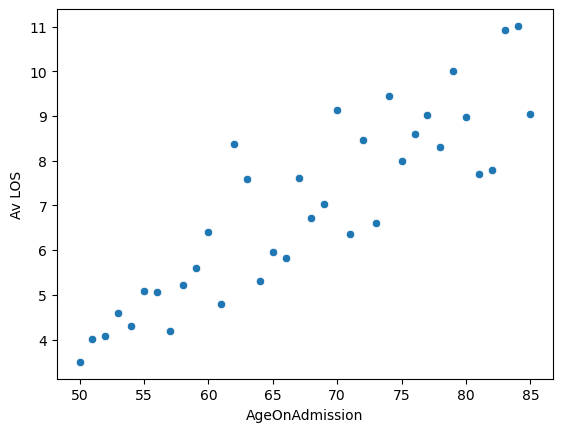

In [6]:
# Use seaborn to create a scatter plot of "AgeOnAdmission" against "Av LOS"

sns.scatterplot(data=LOS_group, x="AgeOnAdmission", y="Av LOS");

<div class="alert alert-block alert-warning">

### Questions?
    Can we see a linear relationship?
    
    Is it viable to proceed?
    

(We will ignore the possible presence of heteroscedasticity and move on for now, it is important for the Statisticians approach and explainability of features, but not for predictive modelling)

# Correlation coefficient

In [11]:
# Quantify this with the correlation coefficient

LOS_group['AgeOnAdmission'].corr(LOS_group["Av LOS"]).round(2)

0.88

## Building the Linear Model

Statsmodels does not include an intercept by default because it gives users explicit control over model specification, unlike libraries like scikit-learn which include an intercept by default for convenience.

Why this design choice?
Transparency and statistical clarity:
statsmodels is designed for statisticians and researchers who often want precise control over the design matrix (independent variables). Automatically adding a constant could obscure model structure or interfere with special cases (e.g., no-intercept models, fixed effects, etc.).

In [75]:
# Build the model and print out the summary
# Prepare data
X = sm.add_constant(LOS_group['AgeOnAdmission'])  # adds intercept term
y = LOS_group['Av LOS']

# Fit model
model = sm.OLS(y, X).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Av LOS   R-squared:                       0.779
Model:                            OLS   Adj. R-squared:                  0.772
Method:                 Least Squares   F-statistic:                     119.8
Date:                Mon, 05 May 2025   Prob (F-statistic):           1.10e-12
Time:                        19:20:07   Log-Likelihood:                -49.402
No. Observations:                  36   AIC:                             102.8
Df Residuals:                      34   BIC:                             106.0
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const             -4.6798      1.076     -4.349      0.000      -6.867      -2.493
AgeOnAdmission     0.1725      0.016     10.945      0.000       0.140       0.204
==============================================================================
Omnibus:                        1.182   Durbin-Watson:                   2.397
Prob(Omnibus):                  0.554   Jarque-Bera (JB):                1.134
Skew:                           0.390   Prob(JB):                        0.567
Kurtosis:                       2.615   Cond. No.                         449.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

<div class="alert alert-block alert-warning">

    --P-value a feature should have a p-value of less than 0.05 in order for us to regard it as significant in our model. A value higher than this is generally viewed to be stastically insignificant and it should be excluded from our explanitory variables
    
    -- R^2 is the coefficient of determination. It represents the proportion of variance in target variable due to the input variables.

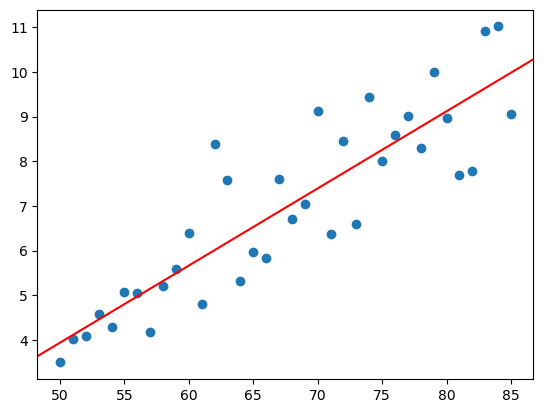

In [49]:
# Using Matplotlib, pLot the model on the same chart as the data

# set up for multiple plots
fig, ax = plt.subplots()

# Scatter plot
ax.scatter(LOS_group['AgeOnAdmission'], LOS_group['Av LOS'])

# Regression line on same axes
sm.graphics.abline_plot(model_results=model, ax=ax, color='red')

# display the plot
plt.show()

# Interpolation, Extrapolation and Outliers

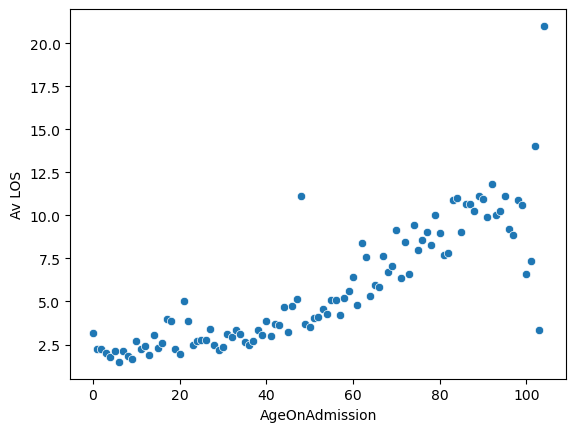

In [64]:
# load in the full data and display as a scatter plot

LOS_full = pd.read_csv('data/AgeSeverity.csv')
sns.scatterplot(data=LOS_full, x="AgeOnAdmission", y="Av LOS");

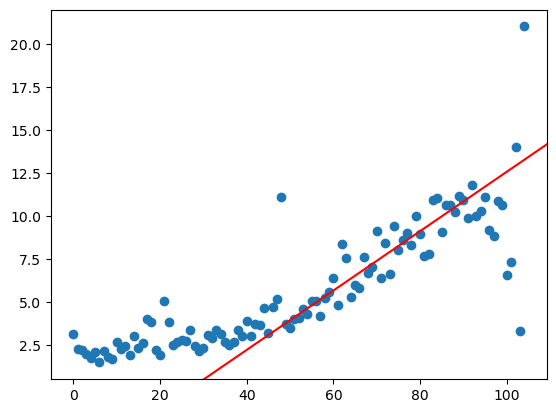

In [50]:
# Using Matplotlib, pLot the model on the same chart as the data

fig, ax = plt.subplots()

# Scatter plot
ax.scatter(df3['AgeOnAdmission'], df3['Av LOS'])

# Regression line on same axes
sm.graphics.abline_plot(model_results=model, ax=ax, color='red')

# Set limits
# ax.set(ylim=(2,11), xlim=(50,85))

plt.show()

<div class="alert alert-block alert-warning">

-**Extrapolation**
    
     --Here we can see the dangers of extrapolation.
    -- This isdrawing conclusions or making predictions about data outside the range of what we have previoulsy seen
    
    
    
-**Solutions**
     
    --There are three distinct populations, roughly 0-50, 50-90 and 90+
    --Different ways to model this are
        --Piecewise, seperate Linear Models of each distinct population
        --A Non-linear regression model
    
-**Outliers**
    
    -- Do you see any outliers?
    -- What are the options for these?

# Menti Quiz - retrival before generative
https://www.researchgate.net/publication/360783515_Sequence_matters_Retrieval_practice_before_generative_learning_is_more_effective_than_the_reverse_order

# Exercise - Break out rooms

Examine the results in the tables in Annex E.\
Note the meaning of some of the P-values, Coefficient estimates and R^2 values.\

https://digital.nhs.uk/data-and-information/publications/statistical/dental-working-hours/2022-23-working-patterns-motivation-and-morale/annex-e---regression-analysis-and-key-assumptions